# Spam Email Classifier

## Defining the Question

### Specifying the Data Analytic Question

> Using Naive Bayes Algorithm to classify whether an email is spam or not

### Defining the Metric for Success

> Prediction accuracy of over 85%

### Understanding the context

> The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

> The collection of spam e-mails came from the creators' postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.


### Experimental Design

* Load Data
* Data Cleaning
* Exploratory Data Analysis
* Data Modelling
* Model Evaluation
* Model improvement and tuning
* Challenging the solution



## Loading the Data

In [48]:
# Importing our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Loading and previewing our dataset
cols = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d',          
          'word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',     
          'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',         
          'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',         
          'word_freq_business','word_freq_email','word_freq_you','word_freq_credit',       
          'word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',           
          'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs',         
          'word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85',           
          'word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',
          'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re',           
          'word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',            
          'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average', 
          'capital_run_length_longest','capital_run_length_total','spam']

data = pd.read_csv('spambase.data', names=cols)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [50]:
# Dropping columns counting punctuation marks
data = data.drop(['char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#'], axis=1)

In [51]:
# Shape
data.shape

(4601, 52)

In [52]:
# Check for duplicates
data.duplicated().sum()

549

In [53]:
# Dropping the duplicates
data.drop_duplicates(inplace=True)

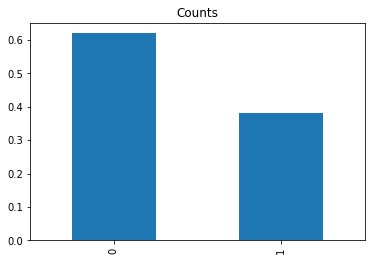

In [54]:
plt.figure('Counts')
plt.title('Counts')
data['spam'].value_counts(normalize=True).plot(kind='bar')

> More than 60% of the data is not spam

In [55]:
# Determining the X and Y
X = data.drop(['spam'], axis = 1)
y = data['spam']

In [56]:
# Splitting the data

# Apply smote to x and y
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=7)
X, y = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
# Scaling data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Fitting our model
multi = MultinomialNB().fit(X_train, y_train)

In [59]:
# Evaluating the Model
predicted = multi.predict(X_test)
print(np.mean(predicted == y_test))

0.863681592039801


In [60]:
# Confusion Matrix
confusion_matrix(y_test, predicted)

array([[386, 111],
       [ 26, 482]])

In [61]:
# Model Evaluation
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       497
           1       0.81      0.95      0.88       508

    accuracy                           0.86      1005
   macro avg       0.87      0.86      0.86      1005
weighted avg       0.87      0.86      0.86      1005



**Repeating the steps with 30% and 40% Test Data**

In [62]:
test_sizes = [0.3, 0.4]

for size in test_sizes:
  smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=7)
  X, y = smote.fit_resample(X, y)
  print('Test Size: ', size*100, '%')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=23)

  scaler = MinMaxScaler().fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  predicted = multi.predict(X_test)
  print('Accuracy: ', np.mean(predicted == y_test))

  print('CONFUSION MATRIX')
  print(confusion_matrix(y_test, predicted))

  print('Further Evaluation\n')
  print(classification_report(y_test, predicted))
  print('\n\n')

Test Size:  30.0 %
Accuracy:  0.8653846153846154
CONFUSION MATRIX
[[583 170]
 [ 33 722]]
Further Evaluation

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       753
           1       0.81      0.96      0.88       755

    accuracy                           0.87      1508
   macro avg       0.88      0.87      0.86      1508
weighted avg       0.88      0.87      0.86      1508




Test Size:  40.0 %
Accuracy:  0.8691542288557214
CONFUSION MATRIX
[[792 223]
 [ 40 955]]
Further Evaluation

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1015
           1       0.81      0.96      0.88       995

    accuracy                           0.87      2010
   macro avg       0.88      0.87      0.87      2010
weighted avg       0.88      0.87      0.87      2010






* 30% and 40% test data size gives the same accuracy of 86.92% which is higher than that of test data size 20%

## Challenging the Solution

> Principal Componet Analysis may be applied to identify the features that contibutes the most in determining whether an email is spam or not.